In [1]:
dir="/project/projectdirs/mpccc/fbench/"
#cd /project/projectdirs/mpccc/fbench/
DIR_IOR_CSCRATCH="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH"


In [2]:
cd /project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW/

/global/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW


In [3]:
ls

1node_mpiio_fpp/  32node_mpiio_fpp/  clean*          note*
1node_mpiio_ssf/  32node_mpiio_ssf/  crontab-backup  submit*
1node_posix_fpp/  32node_posix_fpp/  IOR*            submit-one*
1node_posix_ssf/  32node_posix_ssf/  mygrab*


#  Functions Extracting Max Read/Write and Date of IOR JOB

In [4]:
def parser_ior(dir_path,nodes_posixmpi_dir,block_size,rw_plot,ptitle):
    import re,os,time
    import datetime as dt
    dir_tolook=dir_path+"/"+nodes_posixmpi_dir
    #print dir_tolook
    i=0
    ior_dates=[]
    ior_read=[]
    ior_write=[]
    for filename in os.listdir(dir_tolook):
        if filename.endswith("IOR") and re.search(str(block_size),filename):
            file=open(dir_tolook+'/'+filename,'r') 
            stat = os.stat(dir_tolook+'/'+filename)
            xxt=(dt.datetime.strptime(
                    time.ctime(os.path.getmtime(dir_tolook+'/'+filename))
                    ,'%a %b %d %H:%M:%S %Y').date())
            row = file.readlines()
            for line in row:
                if re.search("Max Write",line):
                    ior_write.append(line.split(' ')[2])
                    ior_dates.append(xxt)
                elif re.search("Max Read",line):
                    ior_read.append(line.split(' ')[3])

    assert len(ior_dates)==len(ior_read), "len dates %d, len read %d"%(len(ior_dates),len(ior_read))
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    %matplotlib inline
    #x = [dt.datetime.strftime(d,'%m-%d-%Y') for d in ior_dates]
    x=ior_dates
    #print x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().set_xticks(x)
    #plt.gca().xaxis.set_major_locator(Null)
    plt.ylabel("MiB/s")
    plt.xlabel("Date")
    plt.title(ptitle)
    #plt.xaxis
    fig = plt.gcf()
    fig.set_size_inches(16, 6.5)
    #fig.savefig('test2png.png', dpi=100)
    if (rw_plot=="readwrite"):
        plt.plot(x,ior_read,'-o',label="read")
        plt.plot(x,ior_write,'-ro',label="write")
        plt.legend(["Read","Write"],loc="upper right")
    elif (rw_plot=="read"):
        plt.plot(x,ior_read,'-ro',label="read")
    elif(rw_plot=="write"):
        plt.plot(x,ior_write,'-ro',label="write")
    
    plt.setp( plt.gca().xaxis.get_majorticklabels(), rotation=80 )
    #plt.gcf().autofmt_xdate()
    plt.savefig("/global/homes/j/jialin/cori_dvs.png",dpi=500)

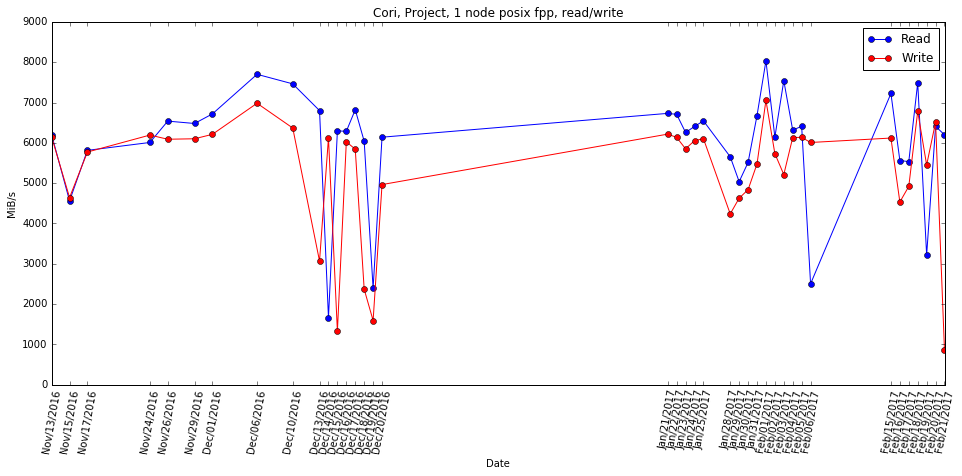

In [5]:
IOR_DVS_DIR="/project/projectdirs/mpccc/fbench/IOR_DVS/1node_posix_fpp/CORI_dvs_1"
NODES_POSIXMPI_DIR=""
BLOCK_SIZE="_1000000_" #10000, 100000
title="Cori, Project, 1 node posix fpp, read/write"
xd=parser_ior(IOR_DVS_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title)

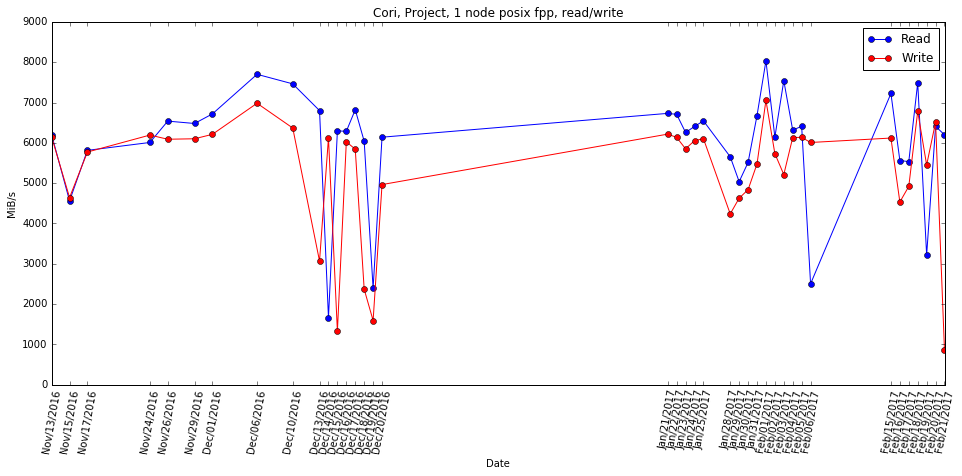

In [6]:
IOR_DVS_DIR="/project/projectdirs/mpccc/fbench/IOR_DVS/1node_posix_fpp/CORI_dvs_1"
NODES_POSIXMPI_DIR=""
BLOCK_SIZE="_1000000_" #10000, 100000
title="Cori, Project, 1 node posix fpp, read/write"
xd=parser_ior(IOR_DVS_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title)

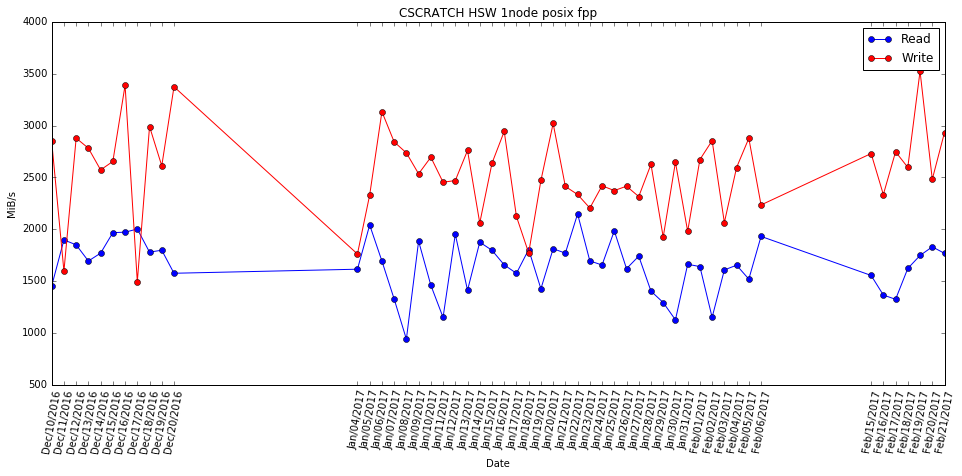

In [7]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="1node_posix_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

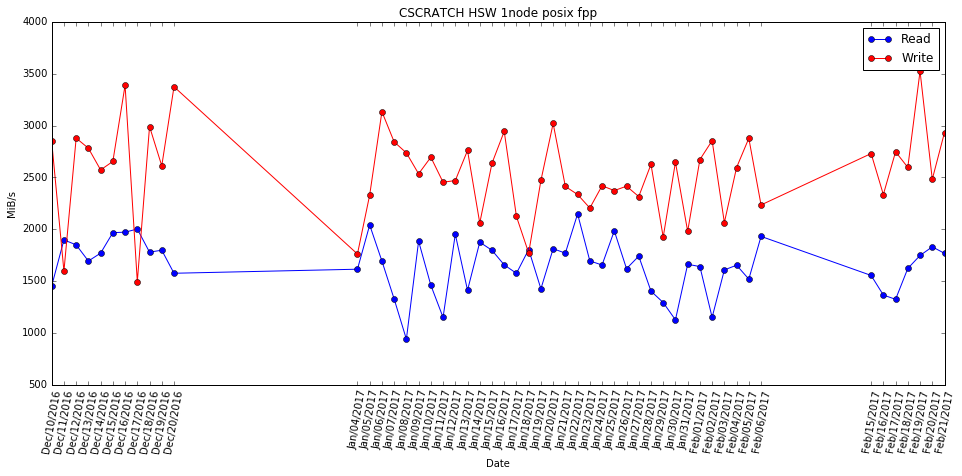

In [8]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="1node_posix_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

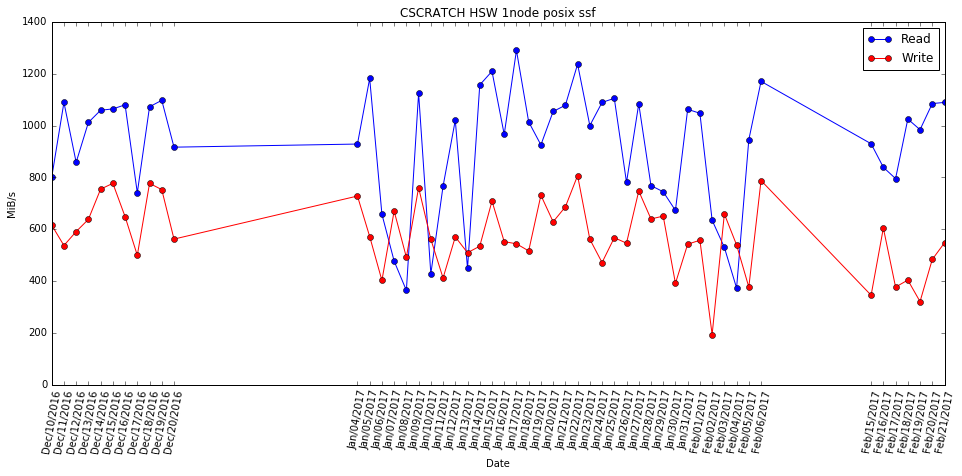

In [9]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="1node_posix_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

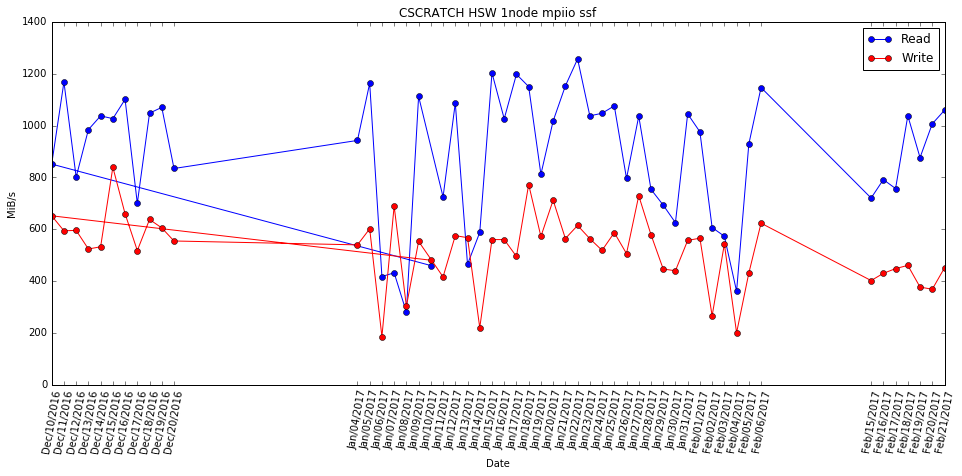

In [10]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="1node_mpiio_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

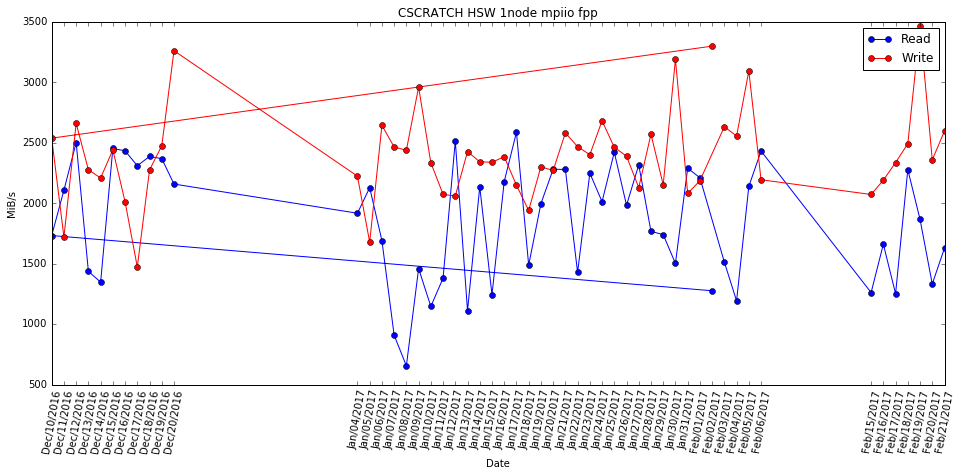

In [11]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="1node_mpiio_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

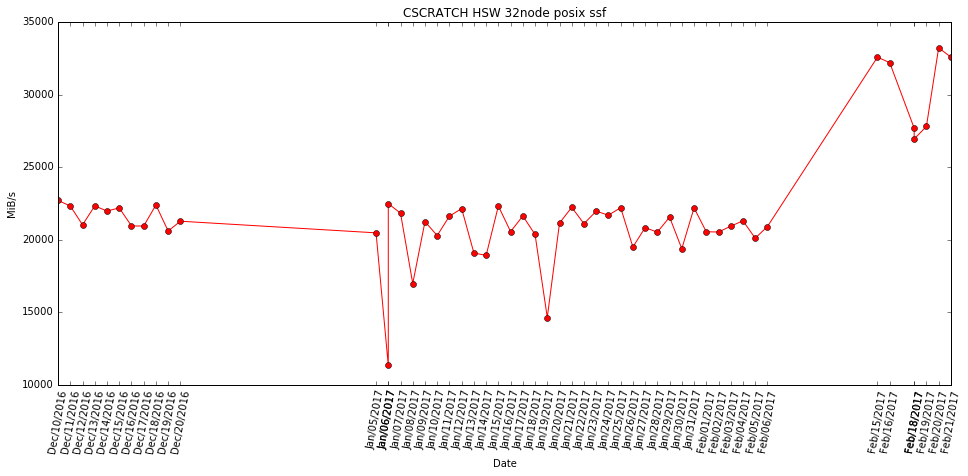

In [12]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="32node_posix_ssf"
BLOCK_SIZE="ssf" #the 32 node job has different name
title="CSCRATCH HSW 32node posix ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"write",title) # options are read, write, readwrite

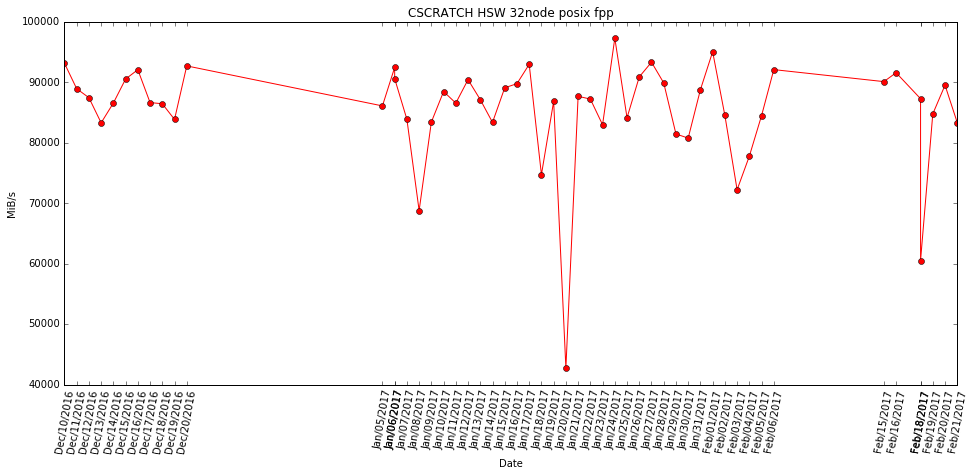

In [13]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="32node_posix_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node posix fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"write",title) # options are read, write, readwrite

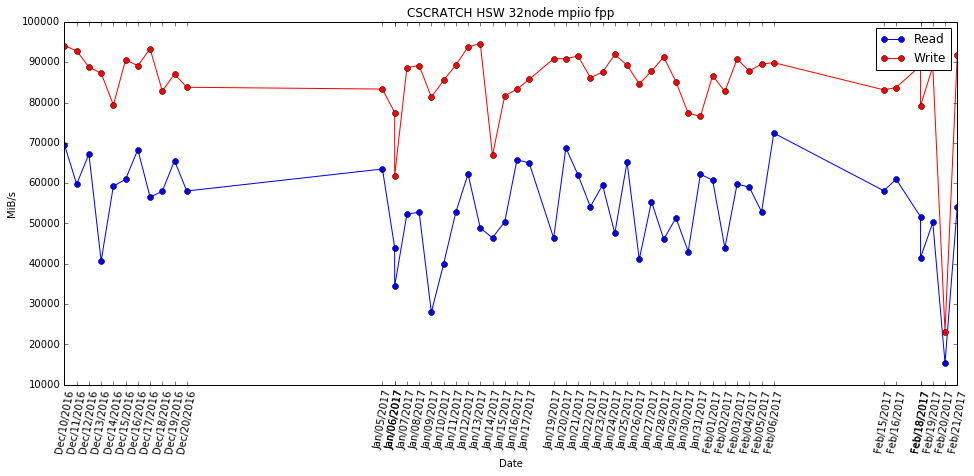

In [14]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="32node_mpiio_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node mpiio fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title) # options are read, write, readwrite

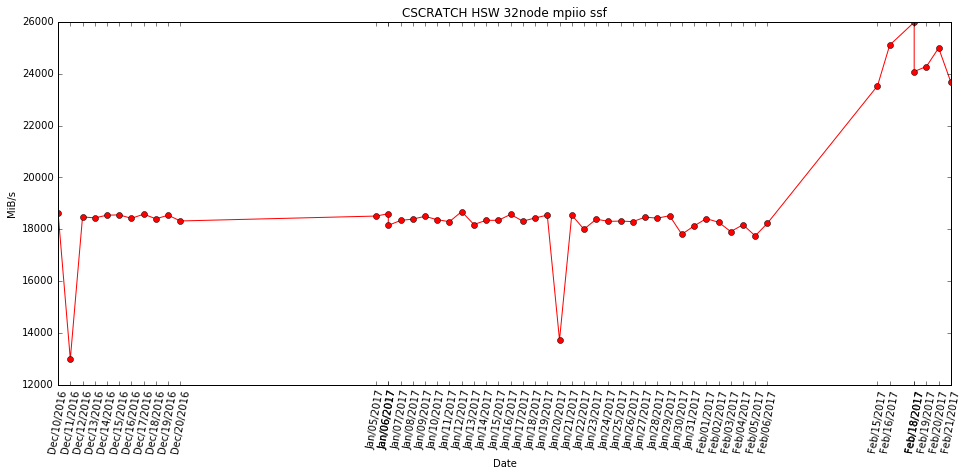

In [15]:
IOR_HSW_DIR="/project/projectdirs/mpccc/fbench/IOR_CSCRATCH/IOR_HSW"
NODES_POSIXMPI_DIR="32node_mpiio_ssf"
BLOCK_SIZE="ssf" #10000, 100000
title="CSCRATCH HSW 32node mpiio ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"write",title) # options are read, write, readwrite